<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Session_13__MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

#Session-13: Multi-Layer Peceptron (MLP)


###Objective: 
1. *Introduce with Tensorflow.*
2. *Construct MLP architecture for computer vision and NLP application.*
3. *Get familiar with Early stopping and Checkpoint method.*

 



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler

# Deep learning Librarires


import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
print(tf.__version__)

2.8.2


##Handwritten Character Dataset

In [ ]:
# Download the train data
!wget -O mnist_train.csv https://www.dropbox.com/s/yrqwhkqj8914h9l/mnist_train.csv?dl=0

In [ ]:
# Download the test data
!wget -O mnist_test.csv https://www.dropbox.com/s/3c02b49hcze40i6/mnist_test.csv?dl=0

In [ ]:
"""importing the dataset """

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# print first five row
train_data.head()

In [ ]:
# drop the first column 
train_images = train_data.iloc[:,1:]
train_labels = train_data.iloc[:,0:1]
train_labels

#train_images

In [ ]:
# count the labels distribution
train_labels.value_counts()

In [ ]:
# drop the first column 
test_images = test_data.iloc[:,1:]
test_labels = test_data.iloc[:,0:1]
test_labels

#test_images

In [ ]:
print("Training Set: ",train_images.shape)
print("Test Set: ", test_images.shape)

Training Set:  (60000, 784)
Test Set:  (10000, 784)


## Plotting some digits

In [ ]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_images.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"{train_labels.iloc[digit_num].values}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

##Single Layer Neural Network

In [ ]:
# Functional API

# A single layer neural network

input_img = Input(shape=(784,))
dense = Dense(14, activation="relu")(input_img)
output = Dense(10,activation = "softmax")(dense)
model = Model(inputs=input_img, outputs=output, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 14)                10990     
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
Total params: 11,140
Trainable params: 11,140
Non-trainable params: 0
_________________________________________________________________


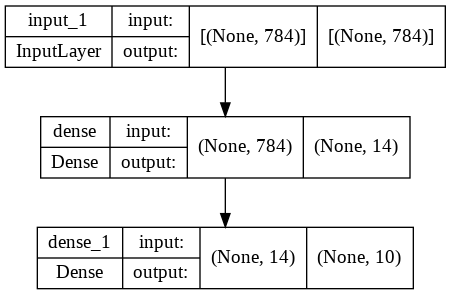

In [ ]:
# You can also plot the model as a graph:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
keras.backend.clear_session()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2)


In [ ]:

test_scores = model.evaluate(test_images, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.4954 - accuracy: 0.9064 - 430ms/epoch - 1ms/step
Test loss: 0.49540743231773376
Test accuracy: 0.9064000248908997


# Use CallBacks

In [ ]:
# stop training if ==0.95

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if (logs.get('accuracy')>0.95):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

      
callbacks = myCallback() 

In [ ]:
keras.backend.clear_session()

# compile the mode
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=["accuracy"],
)

#train the model

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2, callbacks = [callbacks])

### Plot Accuracy and Loss

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )

plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.legend(['train', 'val'])

## Use Callbacks with Checkpoint

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint] 


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2, callbacks = [callback_list])


In [ ]:
# Recreate the exact same model purely from the file:
model = load_model("mymodel.h5")

In [ ]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(test_labels,y_pred))

##Task

1. Design A Multilayer Neural Network for digit classification.

2. Try to tune the Hyperparameters (i.e., no. of nodes, layers, optimizer, batch size) to improve the performance.


# Bangla Handwritten Character Dataset



**Ekush: A Multipurpose and Multitype Comprehensive Database for Online Off-line Bangla Handwritten Characters. Ekush has several features:**

 - Characters Recognition
 - Recognition in context
 - Gender Identification
 - Forensic Investigation
 - 673,482‬ character instances
 - 242 character class
 - 4 captions per image
 - 340,243‬ Female data
 - 333,239‬ Male data

In [ ]:
# run the cell to download the data
!wget -O ekush.zip https://www.dropbox.com/s/sym70dkootl09va/ekushCSV.zip?dl=0


In [ ]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("ekush.zip", 'r')
zip_ref.extractall("bangla-digit")
zip_ref.close()

#Text Classification (Tfidf + MLP)

In [ ]:
# Download the data
!wget -O reviews.csv https://www.dropbox.com/s/vyhodtbbumedlv2/restaurant-reviews.csv?dl=0

In [ ]:
# %%time 
data = pd.read_csv("reviews.csv")
data = data.dropna()

In [ ]:
print("Size of the total data==> ", len(data))
class_names= data.Sentiment.unique() ## Get the unique values in a specific column
print(class_names)

Size of the total data==>  1431
['positive' 'negative']


In [ ]:
data['training_label']=data.Sentiment.replace({'positive':1,'negative':0})
data.sample(20)

In [ ]:
%%time
# text cleaning

import re

def cleaning_bangla(x): 
  x = re.sub('[^\u0980-\u09FF]',' ', x)
  # Remove quotes from source text
  x = re.sub("'", '', x)
  # create a set of all special characters
  x = x.strip()
  return x 

data['cleaned'] = data['Reviews'].apply(cleaning_bangla)

CPU times: user 21.1 ms, sys: 0 ns, total: 21.1 ms
Wall time: 23.9 ms


##TF-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

vec = TfidfVectorizer(ngram_range=(1,1), min_df=1, tokenizer=lambda x: x.split(), use_idf=True)
X = vec.fit_transform(data['cleaned'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,data['training_label'],train_size = 0.8, test_size = 0.2,random_state =0)
print("Training Set: ", X_train.shape)
print("Test Set:", X_test.shape)

Training Set:  (1144, 4264)
Test Set: (287, 4264)


In [ ]:
# Inverse Document Frequency Values for Every Word (4000)
idf_values=pd.DataFrame(vec.idf_,index=vec.get_feature_names_out(),columns=['idf'])
idf_values

In [ ]:
# TF- IDF Values 
tf_idf=pd.DataFrame(X.todense(),columns=[vec.get_feature_names_out()])
tf_idf

In [ ]:
# get the first vector out (for the first document)
print(" Review: ",data['cleaned'][5])
first_vector=X[5]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector.T.todense(), index=vec.get_feature_names_out(), columns=["tfidf"])
d = df.sort_values(by=["tfidf"],ascending=False)

 Review:  সেরা পরিবেশ সঙ্গে শ্রেষ্ঠ স্বাদ  একেবারে প্রিমিয়াম মুরগি


In [ ]:
d['tfidf'][0:10]

## Single Layer Neural Network

In [ ]:
train = np.array(X_train)
train

array(<1144x4264 sparse matrix of type '<class 'numpy.float64'>'
	with 21015 stored elements in Compressed Sparse Row format>, dtype=object)

In [ ]:
# Functional API

# A single layer neural network

input_text = Input(shape=(X_train.shape[1],))
dense = Dense(14, activation="relu")(input_text)
output = Dense(1,activation = "sigmoid")(dense)
model = Model(inputs=input_text, outputs=output, name="text_model")
model.summary()

In [ ]:
filepath = "my_textmodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list

In [ ]:
keras.backend.clear_session()

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(),
    metrics=["accuracy"],
)
y = np.array(y_train)

history = model.fit(X_train.todense(), y_train, batch_size=32, epochs=50,validation_split=0.1,callbacks = [checkpoint])

In [ ]:
model = load_model('my_textmodel.h5')

In [ ]:
y_pred = model.predict(X_test.todense())
pred = y_pred>0.5
pred = pred.astype(int)
###
report = classification_report(y_test, pred, target_names=['negative','positive'])
cm= confusion_matrix(y_test, pred)
print(report)
print(cm)
print("accuracy: {:0.3f}".format(accuracy_score(y_test, pred)))

##Task

1. Try to use Bigram, Trigram
2. Try to use medium and large sized model